In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Define file paths for raw data
raw_data_2024_opp = Path('data/raw/24_25_NBA_opp.csv')
raw_data_2024_team = Path('data/raw/24_25_NBA_team.csv')
raw_data_2025_opp = Path('data/raw/25_26_NBA_opp.csv')
raw_data_2025_team = Path('data/raw/25_26_NBA_team.csv')

# Define file paths for processed data
processed_path = Path('data/processed')

# Load datasets into DataFrames
df_24_opp = pd.read_csv(raw_data_2024_opp)
df_24_team = pd.read_csv(raw_data_2024_team)
df_25_opp = pd.read_csv(raw_data_2025_opp)
df_25_team = pd.read_csv(raw_data_2025_team)


Matplotlib is building the font cache; this may take a moment.


In [ ]:
#display the first few rows of each dataframe

#df_24_opp.head()
df_24_team.head()
#df_25_opp.head()
#df_25_team.head()

#check the structure of the dataframe

#df_24_opp.info()
#df_24_team.info()
#df_25_opp.info()
#df_25_team.info()

In [ ]:
#change the name of columns to prepare to merge dataframes, using list comprehension
df_24_opp.columns = [c + '_opp' if c != 'Team' else c for c in df_24_opp.columns]
df_24_team.columns = [c + '_team' if c != 'Team' else c for c in df_24_team.columns]

#df_24_opp.head()
#df_24_team.head()




In [4]:
#change the name of columns to prepare to merge dataframes, using list comprehension
df_25_opp.columns = [c + '_opp' if c != 'Team' else c for c in df_25_opp.columns]
df_25_team.columns = [c + '_team' if c != 'Team' else c for c in df_25_team.columns]

#df_25_opp.head()
#df_25_team.head()

In [5]:
#merge dataframes on 'Team' column Season 2024-25

df_2024 = pd.merge(df_24_team,df_24_opp,on="Team")

df_2024.head()

df_2024.to_csv(processed_path / 'NBA_24_25_season_stats.csv', index=False)





In [6]:
#merge dataframes on 'Team' column Season 2025-26

df_2025 = pd.merge(df_25_team,df_25_opp,on="Team")

df_2025.head()

df_2025.to_csv(processed_path / 'NBA_25_26_season_stats.csv', index=False)

In [7]:
df_2024['Season']= '2024-25'
df_2025['Season']= '2025-26'


In [ ]:
#check new columns

df_2024.head()
df_2025.head()


In [ ]:
# merge both seasons into a single dataframe

df_nba = pd.concat([df_2024, df_2025], ignore_index=True)
df_nba.sample(10)

In [10]:
# Save the combined dataframe to a CSV file

df_nba.to_csv(processed_path / 'NBA_stats.csv', index=False)

In [ ]:
df_nba_stats = pd.read_csv(processed_path / 'NBA_stats.csv')

df_nba_stats.tail()

In [ ]:
# Responding the question: Who are the top contenders based on Net Rating, 2024?

# Adding a new column 'Net_Rating' to the dataframe: PTS_team - PTS_opp

df_nba_stats['Net_Rating'] = df_nba_stats['PTS_team'] - df_nba_stats['PTS_opp']

# Display the top 10 teams based on Net Rating Season 2024-25

top_teams_2024 = df_nba_stats.loc[df_nba_stats['Season']=='2024-25',['Team', 'Season', 'Net_Rating']].sort_values(by='Net_Rating', ascending=False).head(5)

top_teams_2024


In [ ]:
top_teams_2024_x = top_teams_2024['Team'].to_list()

top_teams_2024_y = top_teams_2024['Net_Rating'].to_list()

plt.bar(top_teams_2024_x, top_teams_2024_y, width=0.7)
plt.title('Top 5 NBA Teams by Net Rating (2024-25 Season)')
plt.xlabel('Teams')
plt.ylabel('Net Rating')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Responding the question: Who are the top contenders based on Net Rating, 2025?

# Adding a new column 'Net_Rating' to the dataframe: PTS_team - PTS_opp

df_nba_stats['Net_Rating'] = df_nba_stats['PTS_team'] - df_nba_stats['PTS_opp']

# Display the top 10 teams based on Net Rating Season 2025-26

top_teams_2025 = df_nba_stats.loc[df_nba_stats['Season']=='2025-26',['Team', 'Season', 'Net_Rating']].sort_values(by='Net_Rating', ascending=False).head(5)

top_teams_2025

In [ ]:
top_teams_2025_x = top_teams_2025['Team'].to_list()

top_teams_2025_y = top_teams_2025['Net_Rating'].to_list()

plt.bar(top_teams_2025_x, top_teams_2025_y, width=0.7)
plt.title('Top 5 NBA Teams by Net Rating (2025-26 Season)')
plt.xlabel('Teams')
plt.ylabel('Net Rating')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Which teams have the most efficient offense vs. the most suffocating defense? 2025 season

# To respond: Offensive Efficiency: PTS. Defensive Efficiency:PTS_opp

df_2025 = df_nba_stats[df_nba_stats['Season'] == '2025-26']
df_2025.head()

mean_PTS_team_2025 = df_2025['PTS_team'].mean()
mean_PTS_opp_2025 = df_2025['PTS_opp'].mean()

plt.figure(figsize=(10, 8))
plt.scatter(df_2025['PTS_team'], df_2025['PTS_opp'])

# Create the labels for each point
for i, row in df_2025.iterrows():
    plt.annotate(row['Team'], (row['PTS_team'], row['PTS_opp']), fontsize=9, alpha=0.7)

# invert the axis so that "less points allowed" is at the top
plt.gca().invert_yaxis() 
plt.axvline(mean_PTS_team_2025, color='red', linestyle='--', alpha=0.5)
plt.axhline(mean_PTS_opp_2025, color='blue', linestyle='--', alpha=0.5)
plt.xlabel('Points Scored (Offense)')
plt.ylabel('Points Allowed (Defense)')
plt.title('NBA 2025: Offensive vs Defensive Efficiency')
plt.show()

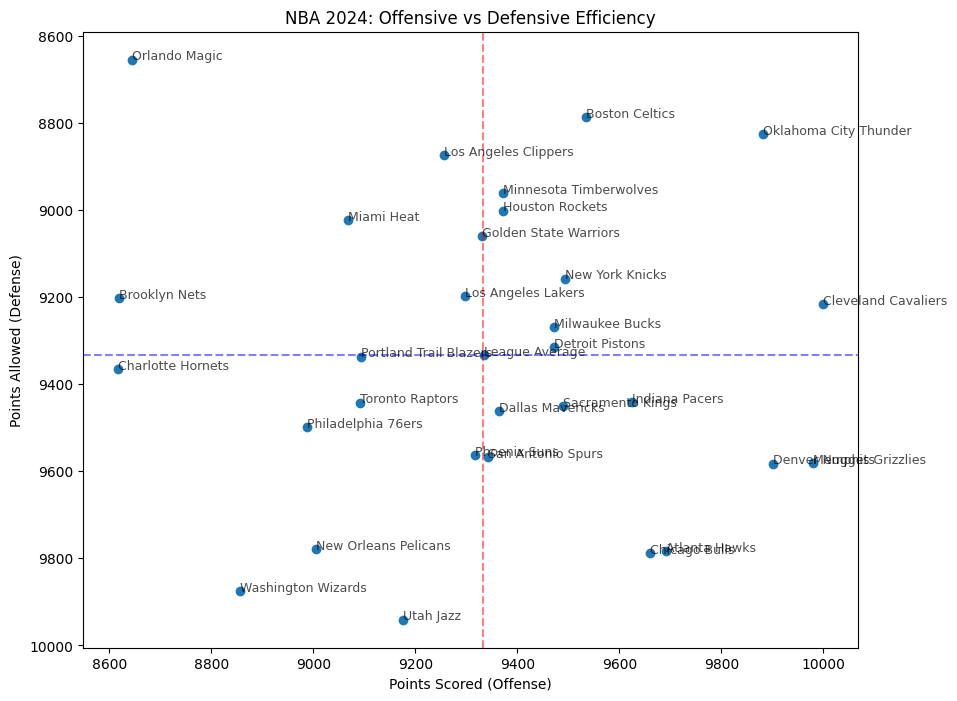

In [37]:
#Which teams have the most efficient offense vs. the most suffocating defense? 2024 season

# To respond: Offensive Efficiency: PTS. Defensive Efficiency:PTS_opp

# Estructura lógica (intenta escribirlo tú):
df_2024 = df_nba_stats[df_nba_stats['Season'] == '2024-25']
df_2024.head()
mean_PTS_team_2024 = df_2024['PTS_team'].mean()
mean_PTS_opp_2024 = df_2024['PTS_opp'].mean()

plt.figure(figsize=(10, 8))
plt.scatter(df_2024['PTS_team'], df_2024['PTS_opp'])
# Create the labels for each point
for i, row in df_2024.iterrows():
    plt.annotate(row['Team'], (row['PTS_team'], row['PTS_opp']), fontsize=9, alpha=0.7)


# Invertir el eje para que "menos puntos recibidos" esté arriba
plt.gca().invert_yaxis() 
plt.axvline(mean_PTS_team_2024, color='red', linestyle='--', alpha=0.5)
plt.axhline(mean_PTS_opp_2024, color='blue', linestyle='--', alpha=0.5)
plt.xlabel('Points Scored (Offense)')
plt.ylabel('Points Allowed (Defense)')
plt.title('NBA 2024: Offensive vs Defensive Efficiency')
plt.show()

In [64]:
#Is there a high correlation between Total Rebounds (TRB) and Win Percentage?

#df_2025.loc[:, ['TRB_opp', 'TRB_team']]
#df_2024.loc[:, ['TRB_opp', 'TRB_team']]

""" correlation_25_team = df_2025['TRB_team'].corr(df_2025['Net_Rating'])
correlation_25_opp = df_2025['TRB_opp'].corr(df_2025['Net_Rating'])

correlation_24_team = df_2024['TRB_team'].corr(df_2024['Net_Rating'])
correlation_24_opp = df_2024['TRB_opp'].corr(df_2024['Net_Rating']) """

# Display correlation results
columns_to_analyze = ['TRB_team', 'TRB_opp', 'Net_Rating']

# Create table of correlations for season 2024-25
#correlation_table_24 = df_2024[columns_to_analyze].corr()
#correlation_table_24

# Create table of correlations for season 2025-26
correlation_table_25 = df_2025[columns_to_analyze].corr()
correlation_table_25






,TRB_team,TRB_opp,Net_Rating
TRB_team,1.000000,0.164327,0.376957
TRB_opp,0.164327,1.000000,-0.367450
Net_Rating,0.376957,-0.367450,1.000000
